In [1]:
%pylab inline
import sys, os
#import QuickPlot
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 8, 6  # that's default image size for this interactive session
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from ipywidgets.widgets import interactive, fixed, interact
%config InlineBackend.figure_format = 'retina'
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import NMF, PCA, FastICA
from sklearn.pipeline import Pipeline
from tabulate import tabulate
#from ncempy.io import mrc
from scipy.signal import medfilt
#import tifffile
import hyperspy.api as hs
import dask.array as da

Populating the interactive namespace from numpy and matplotlib


In [2]:
StackName = 'Stack 9 - 13928s - 80 keV - 60kcps (1).bcf'
BinningFactor = 4

HAADF, EDS = hs.load(StackName)
print(f'Stack dimensions are: {EDS.data.shape}.')

Stack dimensions are: (256, 256, 4096).


In [3]:
import skimage

In [7]:
mask1 = imread('maskC-NA-P.tif')

mask1_scaled = mask1/255

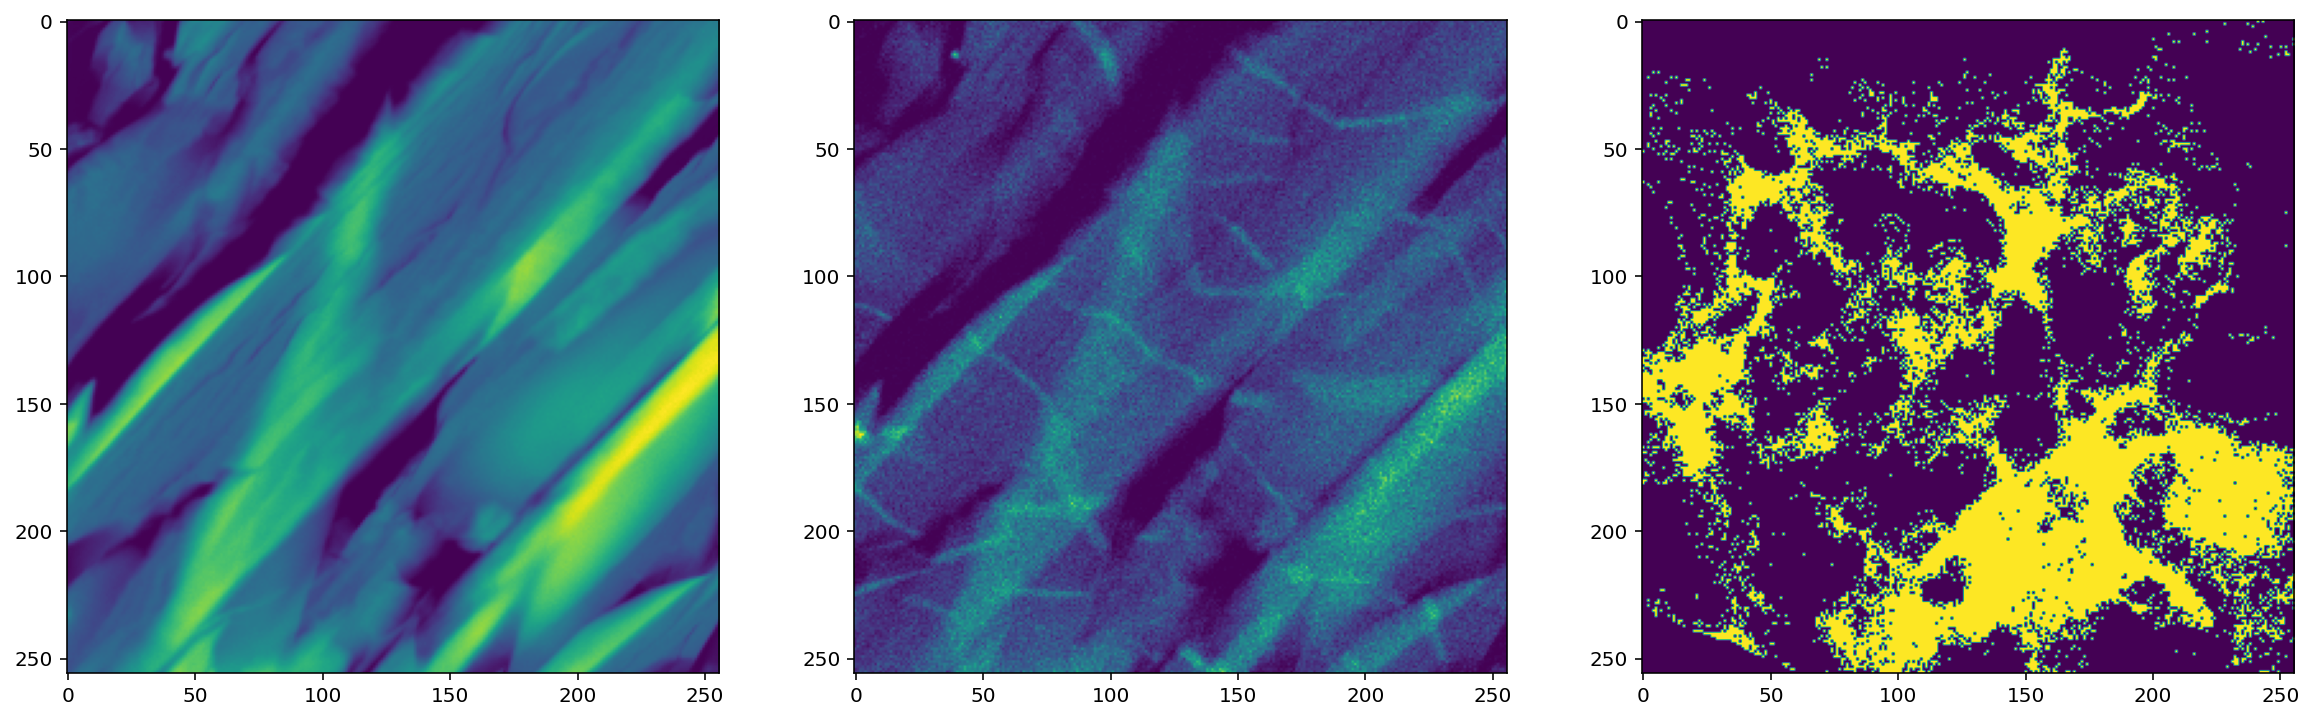

In [21]:
graph = np.sum(EDS.data, axis=2)
Ni = np.sum(EDS.data[:,:,840:860], axis=2)
fig,ax = plt.subplots(1,3, figsize=(20,6))
fig.patch.set_alpha(1)
ax[0].imshow(graph)
ax[1].imshow(Ni)
ax[2].imshow(mask1)

In [10]:
EDS_copy1 = EDS.data.copy()
EDS_copy2 = EDS.data.copy()

In [11]:
EDS_copy1 = EDS_copy1 * mask1_scaled[:,:,None]

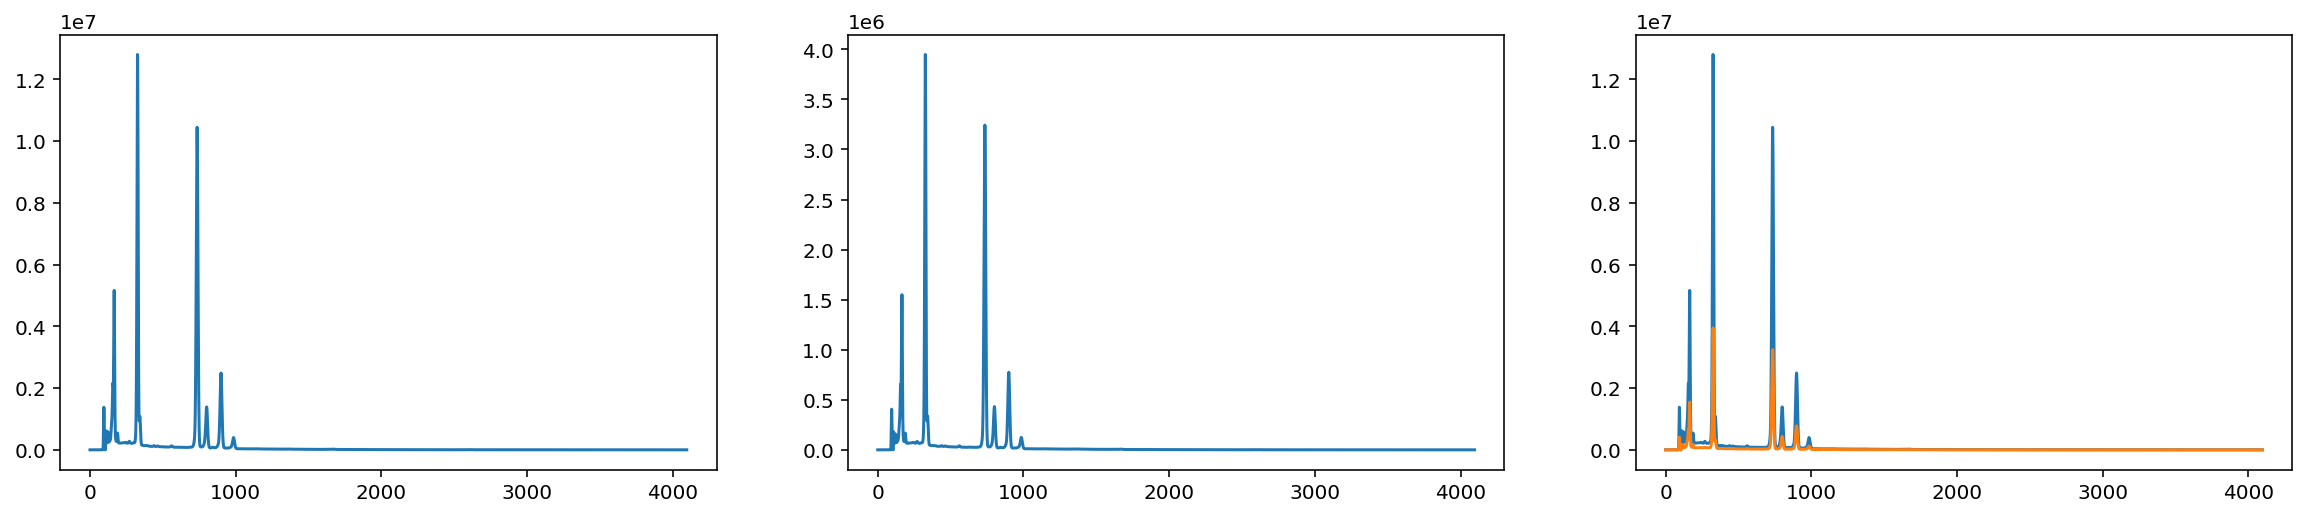

In [15]:
s_original = np.sum(np.sum(EDS.data, axis=0), axis=0)
s1 = np.sum(np.sum(EDS_copy1, axis=0), axis=0)

fig,ax = plt.subplots(1,3, figsize=(20,4))
fig.patch.set_alpha(1)
ax[0].plot(s_original)
ax[1].plot(s1)
ax[2].plot(s_original)
ax[2].plot(s1)


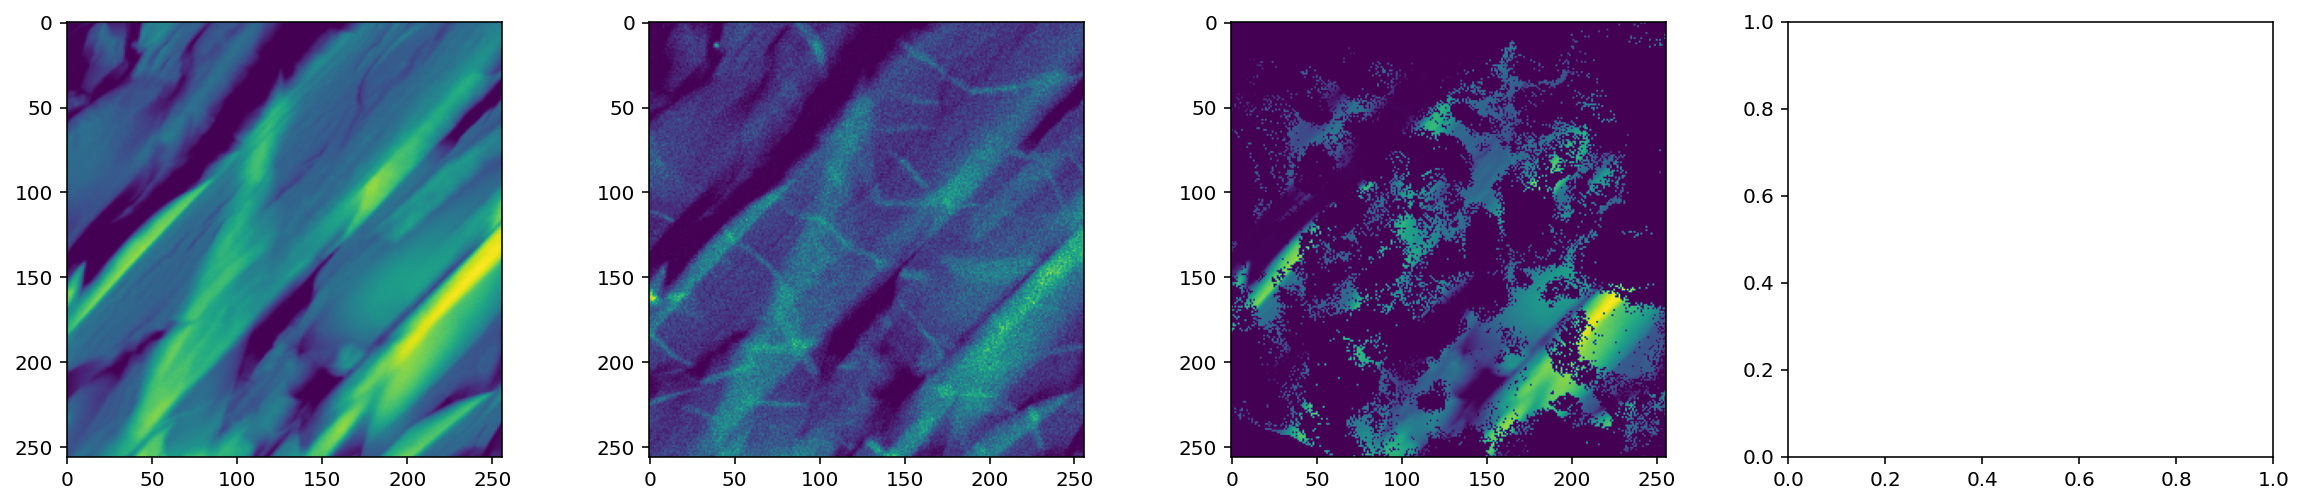

In [17]:
mask_graph1 = np.sum(EDS_copy1, axis=2)

fig,ax = plt.subplots(1,4, figsize=(20,4))
fig.patch.set_alpha(1)
ax[0].imshow(graph)
ax[1].imshow(Ni)
ax[2].imshow(mask_graph1)


In [23]:
np.savetxt(mask_graph1)

TypeError: _savetxt_dispatcher() missing 1 required positional argument: 'X'